## 1. Giới thiệu

### Nhắc lại hai mô hình tuyến tính đã đề cập
Hai mô hình tuyến tính (linear models) [Linear Regression](/2016/12/28/linearregression/) và [Perceptron Learning Algorithm](/2017/01/21/perceptron/) (PLA) chúng ta đã biết đều có chung một dạng:
\\[
y = f(\mathbf{w}^T\mathbf{x})
\\]

trong đó \\(f()\\) được gọi là activation function, và \\(\mathbf{x}\\) được hiểu là dữ liệu mở rộng với \\(x\_0 = 1\\) được thêm vào để thuận tiện cho việc tính toán. Với Linear Regression thì \\(f(s) = s\\), với PLA thì \\(f(s) = \text{sgn}(s)\\). Trong linear regression, tích vô hướng \\(\mathbf{w}^T\mathbf{x}\\) được trực tiếp sử dụng để dự đoán output \\(y\\), loại này phù hợp nếu chúng ta cần dự đoán một giá trị thực của đầu ra không bị chặn trên và dưới. Trong PLA, đầu ra chỉ nhận một trong hai giá trị \\(1\\) hoặc \\(-1 \\), phù hợp với các bài toán _binary classification_. 

Trong bài này, tôi sẽ giới thiệu mô hình thứ ba với activation khác, được sử dụng cho các bài toán _flexible_ hơn. Trong dạng này, đầu ra có thể được thể hiện dưới dạng xác suất (probability). Ví dụ: xác suất thi đỗ nếu biết thời gian ôn thi, xác suất ngày mai có mưa dựa trên những thông tin đo được trong ngày hôm nay,... Mô hình mới này của chúng ta có tên là _logistic regression_. Mô hình này giống với linear regression ở khía cạnh đầu ra là thực, và giống với PLA ở việc đầu ra bị chặn (trong đoạn \\([0, 1]\\)). Mặc dù trong tên có chứa từ _regression_, logistic regression thường được sử dụng nhiều hơn cho các bài toán classification.

### Một ví dụ nhỏ 
Tôi xin được sử dụng [một ví dụ trên Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression):

> Một nhóm 20 sinh viên dành thời gian trong khoảng từ 0 đến 6 giờ cho việc ôn thi. Thời gian ôn thi này ảnh hưởng đến xác suất sinh viên vượt qua kỳ thi như thế nào?_

Kết quả thu được như sau:

| Hours     | Pass   | Hours     | Pass   |
| :-------: | ------ | :-------: | ------ |
| .5        | 0      | 2.75      | 1      |
| .75       | 0      | 3         | 0      |
| 1         | 0      | 3.25      | 1      |
| 1.25      | 0      | 3.5       | 0      |
| 1.5       | 0      | 4         | 1      |
| 1.75      | 0      | 4.25      | 1      |
| 1.75      | 1      | 4.5       | 1      |
| 2         | 0      | 4.75      | 1      |
| 2.25      | 1      | 5         | 1      |
| 2.5       | 0      | 5.5       | 1      |

Mặc dù có một chút _bất công_ khi học 3.5 giờ thì trượt, còn học 1.75 giờ thì lại đỗ, nhưng nhìn chung, học càng nhiều thì khả năng đỗ càng cao. PLA không thể áp dụng được cho bài toán này vì không thể nói một người học bao nhiêu giờ thì 100% trượt hay đỗ, và thực tế là dữ liệu này cũng không _linear separable_ nên thuật toán PLA sẽ không làm việc ở đây. Chúng ta biểu diễn các điểm này trên đồ thị để thấy rõ hơn:

<div class="imgcap">
<img src ="\assets\LogisticRegression\ex1.png" align = "center" width = "800">
<div class = "thecap">Hình 1: Ví dụ về kết quả thi dựa trên số giờ ôn tập.</div>
</div> 

Nhận thấy rằng cả linear regression và PLA đều không phù hợp với bài toán này, chúng ta cần một mô hình _flexible_ hơn.

### Mô hình Logistic Regression
Đầu ra dự đoán của:

* Linear Regression: 
\\[
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x}
\\]
* PLA:
\\[
f(\mathbf{x}) = \text{sgn}(\mathbf{w}^T\mathbf{x})
\\]

Đầu ra dự đoán của logistic regression thường được viết chung dưới dạng:
\\[
f(\mathbf{x}) = \theta(\mathbf{w}^T\mathbf{x})
\\]

Trong đó \\(\theta\\) được gọi là logistic function. Một số activation cho mô hình tuyến tính được cho trong hình dưới đây:

<div class="imgcap">
<img src ="\assets\LogisticRegression\sigmoid.png" align = "center" width = "800">
<div class = "thecap">Hình 1: Các activation function khác nhau cho mô hình tuyến tính.</div>
</div> 

* Đường màu vàng biểu diễn linear regression. Đường này không bị chặn nên không phù hợp cho bài toán này. Thậm chí nếu chúng ta _cắt_ phần nhỏ hơn 0 bằng cách cho chúng bằng 0, _cắt_ các phần lớn hơn 1 bằng cách cho chúng bằng 1, sau đó lấy điểm trên đường thẳng này có tung độ bằng 0.5 làm đường phân chia hai _class_, đây cũng không phải là một lựa chọn tốt. Hãy xem hình dưới đây:
<div class="imgcap">
<img src ="\assets\LogisticRegression\ex1_lr.png" align = "center" width = "800">
<div class = "thecap">Hình 3: .</div>
</div> 
Giả sử có thêm vài bạn _sinh viên tiêu biểu_ ôn tập đến 20 giờ và, tất nhiên, thi đỗ. Khi áp dụng mô hình linear regression như hình trên và lấy mốc 0.5 để phân lớp, toàn bộ sinh viên thi trượt vẫn được dự đoán là trượt, nhưng rất nhiều sinh viên thi đỗ cũng được dự đoán là trượt (nếu ta coi điểm x màu xanh lục là _ngưỡng cứng_ để đưa ra kết luận). Rõ ràng đây là một mô hình không tốt.
* Đường màu đỏ (chỉ khác với activation function của PLA ở chỗ  hai class là 0 và 1 thay vì -1 và 1) cũng thuộc dạng _ngưỡng cứng_ (hard threshold). PLA không hoạt động trong bài toán này vì dữ liệu đã cho không _linearly separable_. Chú ý rằng các điểm màu đỏ và xanh được vẽ ở hai tung độ khác nhau để tiện cho việc minh họa. Các điểm này được vẽ dùng cả đầu vào \\(\mathbf{x}\\) và đầu ra \\(y). Khi ta nói _linearly seperable_ là khi ta chỉ dùng đầu vào \\(\mathbf{x}\\). 
* Các đường màu xanh lam và xanh lục phù hợp với bài toán của chúng ta hơn. Chúng có một vài tính chất quan trọng sau:
    
    - Là hàm số liên tục nhận giá trị thực, bị chặn trong khoảng \\((0, 1)\\).
    - Nếu coi điểm có tung độ là 1/2 làm điểm phân chia thì các điểm càng xa điểm này về phía bên trái có giá trị càng gần 0. Ngược lại, các điểm càng xa điểm này về phía phải có giá trị càng gần 1. Điều này _khớp_ với nhận xét rằng học càng nhiều thì xác suất đỗ càng cao và ngược lại. 
    - _Mượt_ (smooth) nên có đạo hàm mọi nơi, có thể được lợi trong việc tối ưu.
    

### Sigmoid function

Trong số các hàm số có 3 tính chất nói trên thì hàm _sigmoid_:
\\[
f(s) = \frac{1}{1 + e^{-s}} \triangleq \sigma(s)
\\]
được sử dụng nhiều nhất, vì nó bị chặn trong khoảng \\((0, 1)\\). Thêm nữa:
\\[
\lim\_{s \rightarrow -\infty}\sigma(s) = 0; ~~ \lim\_{s \rightarrow +\infty}\sigma(s) = 1 
\\]
Đặc biệt hơn nữa:
\\[
\begin{eqnarray}
\sigma'(s) &=& \frac{e^{-1}}{(1 + e^{-s})^2} \\\
&=& \frac{1}{1 + e^{-s}} \frac{e^{-s}}{1 + e^{-s}} \\\
&=& \sigma(s)(1 - \sigma(s))
\end{eqnarray}
\\]
Công thức đạo hàm đơn giản thế này giúp hàm số này được sử dụng rộng rãi. Ở phần sau, tôi sẽ chứng minh thêm cho các bạn _vì sao người ta đã tìm ra hàm số đặc biệt này_.

## 2. Hàm mất mát và phương pháp tối ưu
Chúng ta tạm quên hàm sigmoid đi và làm với công thức tổng quát cho các logistic function.

### Xây dựng hàm mất mát

Với mô hình như trên, ta có thể giả sử rằng xác suất để một điểm dữ liệu \\(\mathbf{x}\\) rơi vào class 1 là \\(f(\mathbf{w}^T\mathbf{x})\\) và rơi vào class 0 là \\(1 - f(\mathbf{w}^T\mathbf{x})\\). Với mô hình được giả sử như vậy, với các điểm dữ liệu training (đã biết đầu ra \\(y\\)), ta có thể viết như sau:

\\[
\begin{eqnarray}
P(y\_i = 1 | \mathbf{x}\_i; \mathbf{w}) &=& &f(\mathbf{w}^T\mathbf{x}\_i)  ~~(1) \\\
P(y\_i = 0 | \mathbf{x}\_i; \mathbf{w}) &=& 1 - &f(\mathbf{w}^T\mathbf{x}\_i)  ~~(2) \\\
\end{eqnarray}
\\]
trong đó \\( P(y\_i = 1 | \mathbf{x}\_i; \mathbf{w})\\) được hiểu là xác suất xảy ra sự kiện đầu ra \\(y_i = 1\\) khi biết tham số mô hình \\(\mathbf{w}\\) và dữ liệu đầu vào \\(\mathbf{x}_i\\). Bạn đọc có thể đọc thêm [Xác suất có điều kiện](https://vi.wikipedia.org/wiki/Xác_suất_có_điều_kiện). Mục đích của chúng ta là tìm các hệ số \\(\mathbf{w}\\) sao cho \\(f(\mathbf{w}^T\mathbf{x}\_i)\\) càng gần với 1 càng tốt với các điểm dữ liệu thuộc class 1 và càng gần với 0 càng tốt với những điểm thuộc class 0.

Ký hiệu \\(z_i = f(\mathbf{w}^T\mathbf{x}\_i)\\) và viết gộp lại hai biểu thức bên trên ta có:
\\[
P(y\_i| \mathbf{x}\_i; \mathbf{w}) = z\_i^{y_i}\(1 - z\_i\)^{1- y_i}
\\]

Biểu thức này là tương đương với hai biểu thức \\((1)\\) và \\((2)\\) ở trên vì khi \\(y\_i=1\\), phần thứ hai của vế phải sẽ triệt tiêu, khi \\(y\_i = 0\\), phần thứ nhất sẽ bị triệt tiêu! Chúng ta muốn xác suất này đạt giá trị cao nhất, tức là mô hình gần với dữ liệu đã cho nhất.

Xét toàn bộ training set với \\(\mathbf{X} = [\mathbf{x}\_1,\mathbf{x}\_2, \dots, \mathbf{x}\_N]\\) và \\(\mathbf{y} = [y\_1, y\_2, \dots, y\_N]\\), chúng ta cần tìm \\(\mathbf{w}\\) để biểu thức sau đây đạt giá trị lớn nhất:
\\[
P(\mathbf{y}|\mathbf{X}; \mathbf{w})
\\]
ở đây, ta cũng ký hiệu \\(\mathbf{X, y}\\) như các [biến ngẫu nhiên](https://vi.wikipedia.org/wiki/Biến_ngẫu_nhiên) (random variables). Nói cách khác:
\\[
\mathbf{w} = \arg\max_{\mathbf{w}} P(\mathbf{y}|\mathbf{X}; \mathbf{w})
\\]

<a name = "maximun likelihood estimation"></a>

Bài toán tìm tham số để mô hình gần với dữ liệu nhất trên đây có tên gọi chung là bài toán [_maximum likelihood estimation_](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) với hàm số đằng sau \\(\arg\max\\) được gọi là _likelihood function_. Khi làm việc với các bài toán Machine Learning sử dụng các mô hình xác suất thống kê, chúng ta sẽ gặp lại các bài toán thuộc dạng này, hoặc [_maximum a posteriori estimation_](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation), rất nhiều. Tôi sẽ dành 1 bài khác để nói về hai dạng bài toán này.

Giả sử thêm rằng các điểm dữ liệu được sinh ra một cách ngẫu nhiên độc lập với nhau (independent), ta có thể viết:
\\[
\begin{eqnarray}
P(\mathbf{y}|\mathbf{X}; \mathbf{w}) &=& \prod_{i=1}^N P(y\_i| \mathbf{x}\_i; \mathbf{w}) \\\
&=& \prod_{i=1}^N z\_i^{y\_i}(1 - z\_i)^{1- y\_i}
\end{eqnarray}
\\]
với \\(\prod\\) là ký hiệu của tích. 

Trực tiếp tối ưu hàm số này theo \\(\mathbf{w}\\) là rất khó! Hơn nữa, khi \\(N\\) lớn, tích của \\(N\\) số nhỏ hơn 1 có thể dẫn tới sai số trong tính toán (numerial error) vì tích là một số quá nhỏ. Một phương pháp thường được sử dụng đó là lấy logarit tự nhiên (cơ số \\(e\\)) của  _likelihood function_ để tránh việc số quá nhỏ và biến phép nhân thành phép cộng, sau đó lấy ngược dấu để được một hàm và coi nó là hàm mất mát. Lúc này bài toán tìm giá trị lớn nhất (maximum likelihood) trở thành bài toán tìm giá trị nhỏ nhất của hàm mất mát:
\\[
J(\mathbf{w}) = -\log P(\mathbf{y}|\mathbf{X}; \mathbf{w}) = -\sum\_{i=1}^N(y\_i \log {z}\_i + (1-y\_i) \log (1 - {z}\_i))
\\]
với chú ý rằng \\(\theta_i\\) là một hàm số của \\(\mathbf{w}\\). Bạn đọc tạm nhớ biểu thức vế phải có tên gọi là _cross entropy_, thường được sử dụng để đo _khoảng cách_ giữa hai phân phối (distributions). Trong bài toán đan gxét của chúng ta, một phân phối chính là dữ liệu được cho, với xác suất chỉ là 0 hoặc 1; phân phối còn lại được tính theo mô hình logistic regression. _Khoảng cách_ giữa hai phân phối nhỏ đồng nghĩa với việc (_có vẻ hiển nhiên là_) hai phân phối đó rất gần nhau. Tính chất cụ thể của hàm số này sẽ được đề cập trong một bài khác mà tầm quan trọng của nó lớn hơn.

**Chú ý:** Trong machine learning, logarit thập phân ít được dùng, vì vậy \\(\log\\) thường được dùng để ký hiệu logarit tự nhiên.


### Tối ưu hàm mất mát với hàm _sigmoid_

Với hàm _sigmoid_ \\(\sigma\\), nhắc lại tính chất đặt biệt đã chứng minh ở trên: \\(\sigma'(s) = \sigma(s) ( 1 - \sigma(s))\\) và \\(z\_i = \sigma(\mathbf{w}^T\mathbf{x}\_i)\\), ta có:

\\[
\frac{\partial z\_i}{\partial \mathbf{w}} = z\_i (1 - z\_i)\mathbf{x}\_i
\\]
và:

\\[
\frac{\partial \log z\_i}{\partial \mathbf{w}} = \frac{1}{z\_i}\frac{\partial z\_i}{\partial \mathbf{w}} = (1-z\_i)\mathbf{x}\_i
\\]

\\[
\frac{\partial \log(1 - z\_i)}{\partial \mathbf{w}} = -\frac{1}{1 - z\_i}\frac{\partial z\_i}{\partial \mathbf{w}} = -z\_i\mathbf{x}\_i
\\]



Chúng ta lại sử dụng phương pháp [Stochastic Gradient Descent](/2017/01/16/gradientdescent2/#-stochastic-gradient-descent)(SGD) ở đây (_Bạn đọc được khuyến khích đọc SGD để có thể hiểu hơn_) . Hàm mất mát với chỉ một điểm dữ liệu \\((\mathbf{x}\_i, y\_i)\\) là:
\\[
J(\mathbf{w}; \mathbf{x}\_i, y\_i) = -(y\_i \log {z}\_i + (1-y\_i) \log (1 - {z}\_i))
\\]

Với đạo hàm:
\\[
\begin{eqnarray}
\frac{\partial J(\mathbf{w}; \mathbf{x}\_i, y\_i)}{\partial \mathbf{w}} &=& -(\frac{y\_i}{z\_i} - \frac{1- y\_i}{1 - z\_i} ) \frac{\partial z\_i}{\partial \mathbf{w}} \\\
&=& \frac{z\_i - y\_i}{z\_i(1 - z\_i)} \frac{\partial z\_i}{\partial \mathbf{w}} ~~ (3)
\end{eqnarray}
\\]


Để cho biểu thức này trở nên _gọn_ và _đẹp_ hơn, chúng ta sẽ tìm hàm \\(z = f(\mathbf{w}^T\mathbf{x})\\) sao cho mẫu số bị triệt tiêu. Nếu đặt \\(s = \mathbf{w}^T\mathbf{x}\\), chúng ta sẽ có:
\\[
\frac{\partial z\_i}{\partial \mathbf{w}} = \frac{\partial z\_i}{\partial s} \frac{\partial s}{\partial \mathbf{w}} = \frac{\partial z\_i}{\partial s} \mathbf{x}
\\]
Một cách trực quan nhất, ta sẽ tìm hàm số \\(z = f(s)\\) sao cho:
\\[
\frac{\partial z\_i}{\partial s} = z(1 - z) ~~ (4)
\\]
để triệt tiêu mẫu số trong biểu thức \\((3)\\). Chúng ta cùng khởi động một chút với phương trình vi phân đơn giản này. Giải phương trình \\((4)\\):
\\[
\begin{eqnarray}
\frac{\partial z}{z(1-z)} &=& \partial s \\\
\Leftrightarrow (\frac{1}{z} + \frac{1}{1 - z})\partial z &=&\partial s \\\
\Rightleftarrow \log z - \log(1 - z) &=& s \\\
\Rightleftarrow \log \frac{z}{1 - z} &=& s \\\
\Rightleftarrow \frac{z}{1 - z} &=& e^s \\\
\Rightleftarrow z &=& e^s (1 - z) \\\
\Rightleftarrow z &=& \frac{e^s}{1 +e^s} =\frac{1}{1 + e^{-s}} = \sigma{s}
\end{eqnarray}
\\]
Đến đây các bạn đã hiểu hàm số _sigmoid_ được tạo ra như thế nào rồi chứ!

### Công thức cập nhật cho logistic sigmoid regression
Tới đây, bạn đọc có thể kiểm tra rằng, với hàm activation là hàm sigmoid:
\\[
\frac{\partial J(\mathbf{w}; \mathbf{x}\_i, y\_i)}{\partial \mathbf{w}} = -(y\_i - z\_i)\mathbf{x}\_i
\\]
Qúa đẹp!

Và công thức cập nhật (theo thuật toán [SGD](/2017/01/16/gradientdescent2/#-stochastic-gradient-descent)) cho logistic sigmoid regression là: 
\\[
\mathbf{w} = \mathbf{w} + \eta(y\_i - z\_i)\mathbf{x}\_i
\\]
Và, như thường lệ, chúng ta đã có thể lập trình Python cho vài ví dụ.

## 3. Ví dụ với Python
### Ví dụ với dữ liệu 1 chiều
Quay trở lại với ví dụ nêu ở phần Giới thiệu. Trước tiên ta cần khai báo vài thư viện và tạo dữ liệu:

In [177]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extened data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

### Các hàm cần thiết cho logistic sigmoid regression

In [178]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
#         it += 1
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


### Với kết quả tìm được, đầu ra \\(y\\) có thể được dự đoán theo công thức: `y = sigmoid(-4.1 + 1.537*x)`. Với dữ liệu trong tập training, kết quả là:

In [102]:
print(sigmoid(np.dot(w[-1].T, X)))

[[ 0.03281144  0.04694533  0.06674738  0.09407764  0.13102736  0.17961209
   0.17961209  0.24121129  0.31580406  0.40126557  0.49318368  0.58556493
   0.67229611  0.74866712  0.86263755  0.90117058  0.92977426  0.95055357
   0.96541314  0.98329067]]


Biểu diễn kết quả này trên đồ thị ta có:

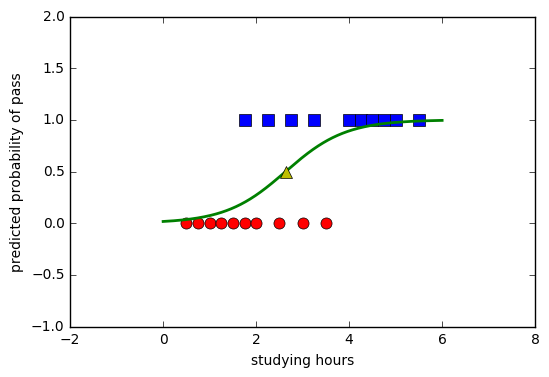

In [180]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.savefig('lg_results.png', bbox_inches='tight', dpi = 300)
plt.show()

Nếu như chỉ có hai output là 'fail' hoặc 'pass', điểm trên đồ thị của hàm sigmoid tương ứng với xác suất 0.5 được chọn làm _hard threshold_ (ngưỡng cứng). Việc này có thể chứng minh khá dễ dàng (tôi sẽ bàn ở phần dưới). 

### Ví dụ với dữ liệu 2 chiều
Chúng ta xét thêm một ví dụ nhỏ nữa trong không gian hai chiều. Giả sử chúng ta có hai class xanh-đỏ với dữ liệu được phân bố như hình dưới. 
<div class="imgcap">
<img src ="\assets\LogisticRegression\logistic_2d.png" align = "center" width = "800">
<div class = "thecap">Hình : .</div>
</div> 
Với dữ liệu đầu vào nằm trong không gian hai chiều, hàm sigmoid có dạng như thác nước dưới đây:
<div class="imgcap">
<img src ="http://galaxy.agh.edu.pl/~vlsi/AI/bias/img/plaszczyzna.gif" align = "center" width = "800">
<div class = "thecap">Hình : Hàm sigmoid với dữ liệu có chiều là 2. (Nguồn: <a = "http://galaxy.agh.edu.pl/~vlsi/AI/bias/bias_eng.html">Biased and non biased neurons</a>)</div>
</div> 

Kết quả tìm được khi áp dụng mô hình logistic regression được minh họa như hình dưới với màu nền khác nhau thể hiện xác suất điểm đó thuộc class đỏ. Đỏ hơn tức gần 1 hơn, xanh hơn tức gần 0 hơn.
<div class="imgcap">
<img src ="\assets\LogisticRegression\logistic_2d_2.png" align = "center" width = "800">
<div class = "thecap">Hình : .</div>
</div> 

Nếu phải lựa chọn một ngưỡng cứng để phân chia hai class, chúng ta sẽ chọn đường thẳng nằm giữa đường màu _vàng_ và _xanh sáng nhất_. Tôi sẽ chứng minh ở phần dưới rằng, đường phân chia giữa hai class tìm được bởi logistic regression có dạng một đường phẳng, tức vấn là linear.

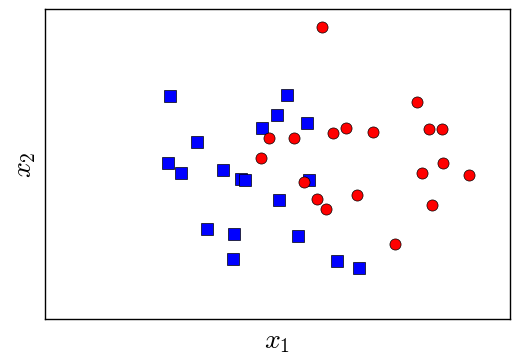

In [174]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [82]:
print(X0.shape)

(20, 2)


In [153]:
X = np.concatenate((X0, X1), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
print(w[-1])

[[-9.40520562]
 [ 2.18391091]
 [ 1.392856  ]]


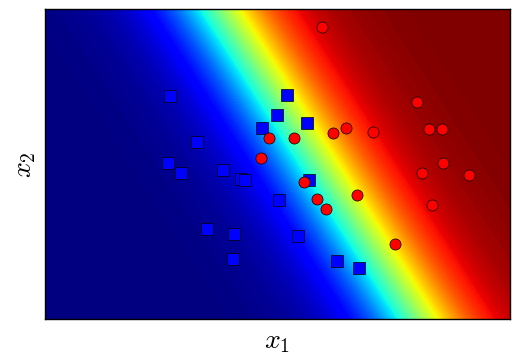

In [175]:
# Make data.
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
zm = sigmoid(w0 + w1*xm + w2*ym)

CS = plt.contourf(xm, ym, zm, 200, cmap='jet')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

## 4. Một vài tính chất của Linear Regression

### Logistic Regression thực ra được sử dụng nhiều trong các bài toán Classification.
Mặc dù có tên là Regression, tức một mô hình cho fitting, Logistic Regression lại được sử dụng nhiều trong các bài toán Classification. Sau khi tìm được mô hình, việc xác định class \\(y\\)cho một điểm dữ liệu \\(\mathbf{x}\\) được xác định bằng việc so sánh hai biểu thức xác suất:
\\[
P(y = 1| \mathbf{x}; \mathbf{w}); ~~ P(y = 0| \mathbf{x}; \mathbf{w}) 
\\]
Nếu biểu thức 1 lớn hơn thì ta kết luận điểm dữ liệu thuộc class 1, ngược lại thì nó thuộc class 0. Một cách gọn hơn, ta chỉ cần xác định xem \\(P(y = 1| \mathbf{x}; \mathbf{w})\\) lớn hay 0.5 hay không. Nếu có, class 1. Nếu không, class 0. 

### Boundary tạo bởi Logistic Regression có dạng tuyến tính
Thật vậy, theo lập luận ở phần trên thì:
\\[
\begin{eqnarray}
P(y = 1| \mathbf{x}; \mathbf{w}) &>& 0.5 \\\
\Leftrightarrow \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}} > 0.5 \\\
\Leftrightarrow e^{-\mathbf{w}^T\mathbf{x}} < 1 \\\
\Leftrightarrow \mathbf{w}^T\mathbf{x} > 0
\end{eqnarray}
\\]
Nói cách khác, boundary giữa hai class là đường có phương trình \\(\mathbf{w}^T\mathbf{x}\\). Đây chính là phương trình của một siêu mặt phẳng. Vậy Logistic Regression tạo ra boundary có dạng tuyến tính.

## 5. Thảo luận 

* Một điểm cộng cho Logistic Regression so với PLA là nó không cần có giả thiết dữ liệu hai class là linearly separable. Tuy nhiên, boundary tìm được vẫn có dạng tuyến tính. Vậy nên mô hình này chỉ phù hợp với loại dữ liệu mà hai class là gần với linearly separable. Một kiểu dữ liệu mà Logistic Regression không làm việc được là dữ liệu một class nằm trong 1 vòng tròn, class kia chứa các điểm bên ngoài đường tròn. Kiểu dữ liệu này được gọi là phi tuyến (non-linear). Trong vài bài tới, tôi sẽ giới thiệu với các bạn các mô hình khác phù hợp hơn với loại dữ liệu này. 
* Một hạn chế nữa của Logistic Regression là nó yêu cầu các điểm dữ liệu được tạo ra một cách độc lập với nhau. Trên thực tế, các điểm dữ liệu có thể bị ảnh hưởng bởi nhau. Ví dụ: có một nhóm ôn tập với nhau trong 4 giờ, cả nhóm đều thi đỗ (giả sử các bạn này học rất tập trung), nhưng có một sinh viên học một mình cũng trong 4 giờ thì xác suất thi đỗ thấp hơn. Tuy nhiên, để cho đơn giản, khi xây dựng mô hình, người ta vẫn thường giả sử các điểm dữ liệu là độc lập với nhau. 
